# Projeto Integrador

### 1. Importar Bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error

### 2. Importar Base:

In [ ]:
#google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_base = pd.read_csv('/content/drive/MyDrive/DH - DATA SCIENCE/PI/BOOKING_8.csv',sep=',')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MESREF_NUM          134235 non-null  int64  
 1   VLR_ENTRADA         134235 non-null  float64
 2   VLR_FINANCIADO      134235 non-null  float64
 3   DOWN_PAYMENT        134235 non-null  float64
 4   RANGE_DOWN_PAYMENT  134235 non-null  object 
 5   QTD_PRAZO           134235 non-null  int64  
 6   QTD_PRAZO_AGRP      134235 non-null  object 
 7   MODELO_AGRP         134235 non-null  object 
 8   ESTADO_VEICULO      134235 non-null  object 
 9   ANO_FABRIC          134235 non-null  int64  
 10  FL_TCM              134235 non-null  int64  
 11  NS_RANGE_REGIAO     134235 non-null  object 
 12  NS_PONTUACAO_CRIVO  134025 non-null  float64
 13  NS_RATING_CRIVO     134235 non-null  object 
 14  GRUPO_LOJAS         134235 non-null  object 
 15  VLR_VEIC            134235 non-nul

### 3. Análise Exploratória

In [ ]:
df_base.head()

,MESREF_NUM,VLR_ENTRADA,VLR_FINANCIADO,DOWN_PAYMENT,RANGE_DOWN_PAYMENT,QTD_PRAZO,QTD_PRAZO_AGRP,MODELO_AGRP,ESTADO_VEICULO,ANO_FABRIC,...,VLR_VEIC,SCORE_PONTOS,max_atraso,FX_MAX_ATRASO,MOB_FINAL_CONTRATO,STATUS_CONTRATO,CONTR_NEW,TIPO_PROD,DELTA_MOB,IDADE_VEIC
0,201804,28650.0,21980.19,0.57,51-60,24,13-24,Etios,N,2019,...,50630.19,995.0,0,0. 00 dpd,21,LIQUIDADO,5318042,CDC,-3,0
1,201804,50557.9,25186.80,0.67,61-80,36,25-36,Corolla,N,2019,...,75744.70,993.0,0,0. 00 dpd,27,LIQUIDADO,5318080,CDC,-9,0
2,201804,21000.0,54979.00,0.28,26-30,36,25-36,Etios,N,2019,...,75979.00,984.0,0,0. 00 dpd,35,LIQUIDADO,5319022,CICLO,-1,0
3,201804,30000.0,25579.99,0.54,51-60,24,13-24,Etios,N,2019,...,55579.99,995.0,2,1. 01-15 dpd,23,LIQUIDADO,5319628,CICLO,-1,0
4,201804,39938.5,46953.10,0.46,41-50,36,25-36,Corolla,N,2018,...,86891.60,976.0,0,0. 00 dpd,35,LIQUIDADO,5319914,CDC,-1,0


In [ ]:
#Tratar base

df_base.isnull().sum()/len(df_base)

MESREF_NUM            0.000000
VLR_ENTRADA           0.000000
VLR_FINANCIADO        0.000000
DOWN_PAYMENT          0.000000
RANGE_DOWN_PAYMENT    0.000000
QTD_PRAZO             0.000000
QTD_PRAZO_AGRP        0.000000
MODELO_AGRP           0.000000
ESTADO_VEICULO        0.000000
ANO_FABRIC            0.000000
FL_TCM                0.000000
NS_RANGE_REGIAO       0.000000
NS_PONTUACAO_CRIVO    0.001564
NS_RATING_CRIVO       0.000000
GRUPO_LOJAS           0.000000
VLR_VEIC              0.000000
SCORE_PONTOS          0.001564
max_atraso            0.000000
FX_MAX_ATRASO         0.000000
MOB_FINAL_CONTRATO    0.000000
STATUS_CONTRATO       0.000000
CONTR_NEW             0.000000
TIPO_PROD             0.000000
DELTA_MOB             0.000000
IDADE_VEIC            0.000000
dtype: float64

In [ ]:
#excluindo valores nulos --- verificar se faz mais sentido excluir ou substituir pela media, mediana, algo do tipo
df_base.dropna(inplace=True)
print(df_base.shape)
print("="*20)
print(df_base.isna().sum())

(134025, 25)
MESREF_NUM            0
VLR_ENTRADA           0
VLR_FINANCIADO        0
DOWN_PAYMENT          0
RANGE_DOWN_PAYMENT    0
QTD_PRAZO             0
QTD_PRAZO_AGRP        0
MODELO_AGRP           0
ESTADO_VEICULO        0
ANO_FABRIC            0
FL_TCM                0
NS_RANGE_REGIAO       0
NS_PONTUACAO_CRIVO    0
NS_RATING_CRIVO       0
GRUPO_LOJAS           0
VLR_VEIC              0
SCORE_PONTOS          0
max_atraso            0
FX_MAX_ATRASO         0
MOB_FINAL_CONTRATO    0
STATUS_CONTRATO       0
CONTR_NEW             0
TIPO_PROD             0
DELTA_MOB             0
IDADE_VEIC            0
dtype: int64


In [ ]:
df_base['DELTA_MOB'].describe().T

count    134025.000000
mean        -10.783145
std          12.714983
min         -60.000000
25%         -19.000000
50%          -5.000000
75%          -1.000000
max          35.000000
Name: DELTA_MOB, dtype: float64

In [ ]:
#o contrato morre em -1, então estou corrigindo a base acrescentando +1, para os contratos finalizados ficarem com 0
df_base['DELTA_MOB'] = df_base['DELTA_MOB']+1
    

In [ ]:
# Checando a quantidade de linhas e colunas
print(f'O Conjunto de Dados possui: {df_base.shape[0]} linhas e {df_base.shape[1]} colunas')

O Conjunto de Dados possui: 134025 linhas e 25 colunas


In [ ]:
#VERIFICANDO SE HÁ LINHAS DUPLICADAS
df_base.value_counts().shape
#nao há linhas duplicadas

(134025,)

In [ ]:
#verificando diferença entre score x crivo
df_base['DIF_SCORE_CRIVO'] =df_base['SCORE_PONTOS'] - df_base['NS_PONTUACAO_CRIVO']
print(df_base['DIF_SCORE_CRIVO'].unique())
#nao tem diferença, desconsiderar uma das duas colunas

[0.]


In [ ]:
df_base.drop(['DIF_SCORE_CRIVO'],axis=1,inplace=True)

In [ ]:
#criando sim ou nao para atraso
df_base.loc[df_base['max_atraso'] >= 1,'JA_ATRASOU_PARCELA'] = 1
df_base.loc[df_base['max_atraso'] < 1,'JA_ATRASOU_PARCELA'] = 0

In [ ]:
#excluindo max_atraso
df_base.drop(['max_atraso'],axis=1,inplace=True)

In [ ]:
df_base['JA_ATRASOU_PARCELA'].value_counts()

0.0    96544
1.0    37481
Name: JA_ATRASOU_PARCELA, dtype: int64

In [ ]:
# vamos checar se há alguma inconsistência nas variáveis
df_base.describe().T

,count,mean,std,min,25%,50%,75%,max
MESREF_NUM,134025.0,2.018965e+05,86.397641,201804.00,201810.00,201904.00,201911.00,202112.00
VLR_ENTRADA,134025.0,5.160903e+04,37307.618990,0.00,28310.00,44000.00,63000.00,396790.00
VLR_FINANCIADO,134025.0,5.297719e+04,33769.393273,2365.77,31676.50,43559.89,63922.03,519548.86
DOWN_PAYMENT,134025.0,4.825617e-01,0.193959,0.00,0.35,0.50,0.60,0.99
QTD_PRAZO,134025.0,3.021803e+01,11.163851,1.00,24.00,36.00,36.00,60.00
ANO_FABRIC,134025.0,2.018876e+03,1.740136,2008.00,2019.00,2019.00,2020.00,2022.00
FL_TCM,134025.0,5.249767e-01,0.499378,0.00,0.00,1.00,1.00,1.00
NS_PONTUACAO_CRIVO,134025.0,9.825824e+02,17.281495,0.00,977.00,988.00,994.00,1000.00
VLR_VEIC,134025.0,1.045862e+05,53000.052618,4928.10,70663.56,90084.65,118906.56,554028.51
SCORE_PONTOS,134025.0,9.825824e+02,17.281495,0.00,977.00,988.00,994.00,1000.00


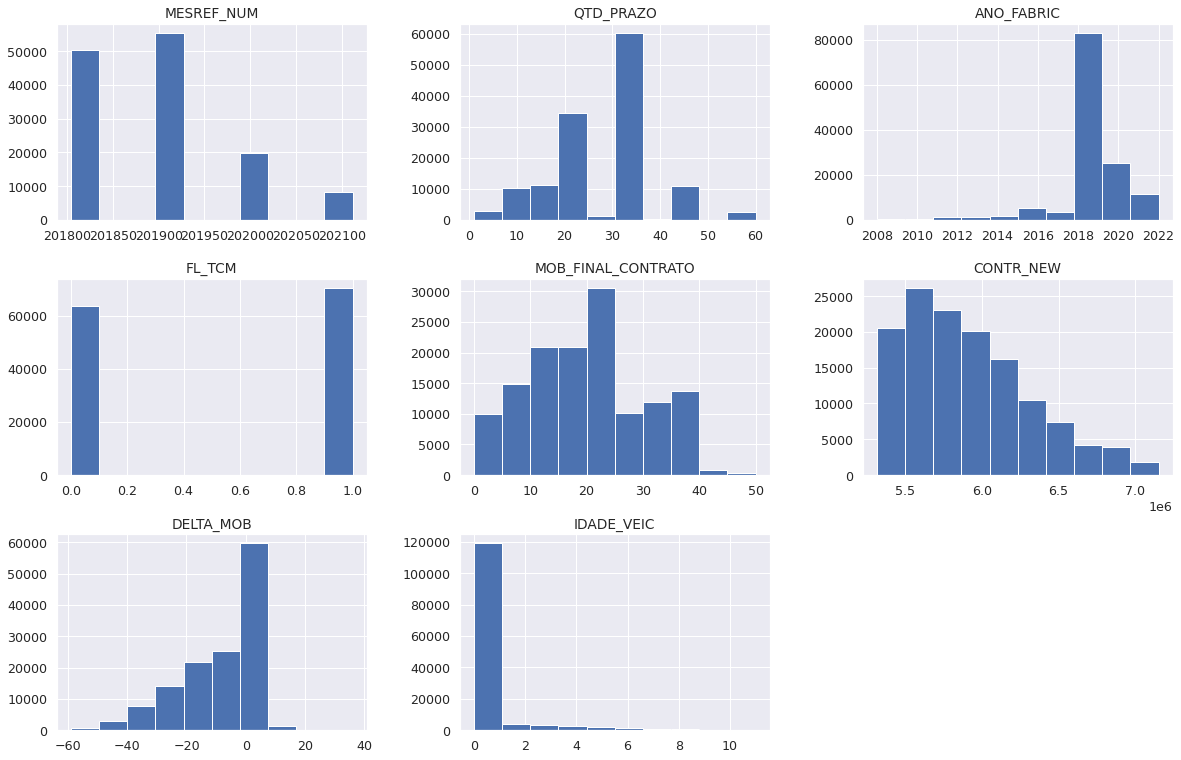

In [ ]:
# Estudo das distribuções das variáveis

df_hist = df_base.loc[:,df_base.select_dtypes(np.int64,np.float64).columns]
df_hist.hist(figsize=(20,13));

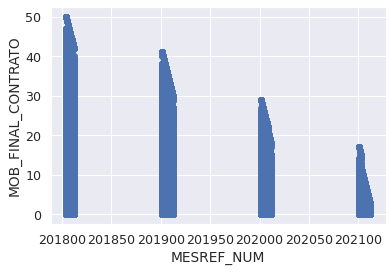

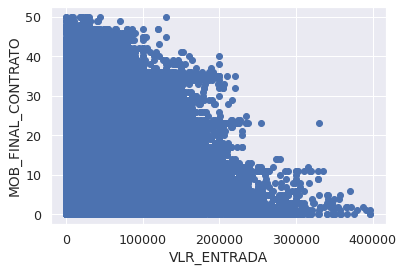

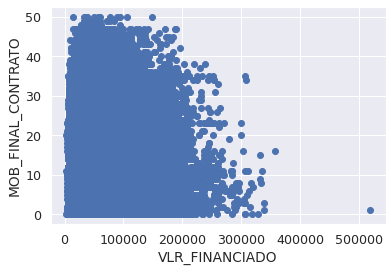

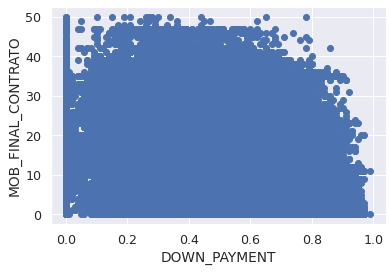

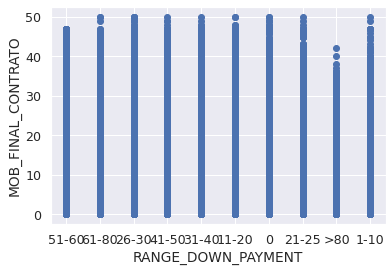

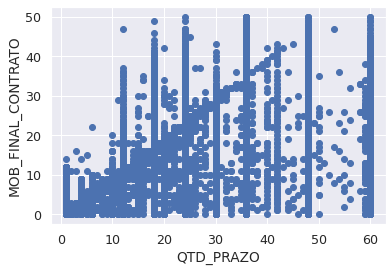

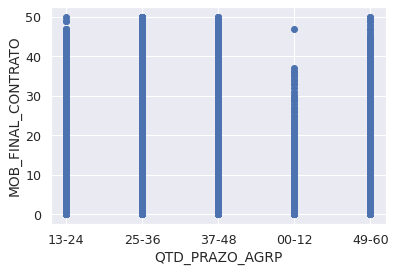

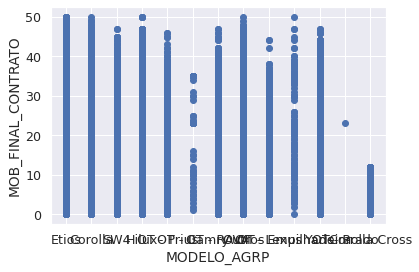

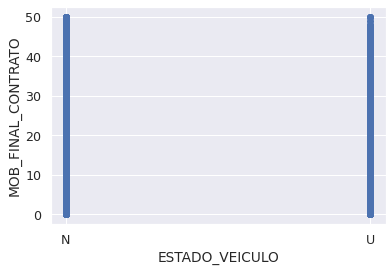

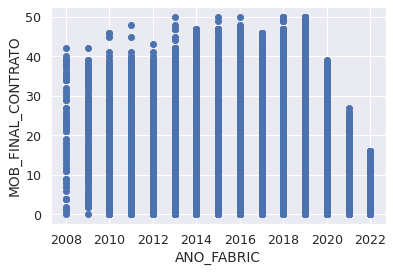

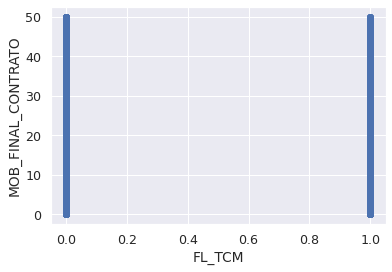

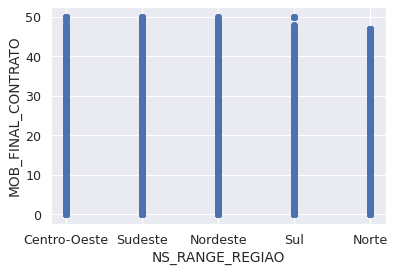

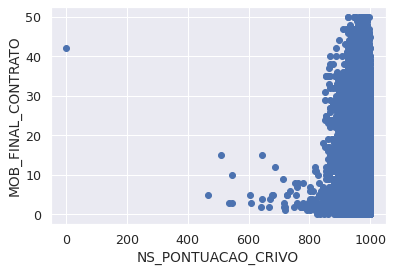

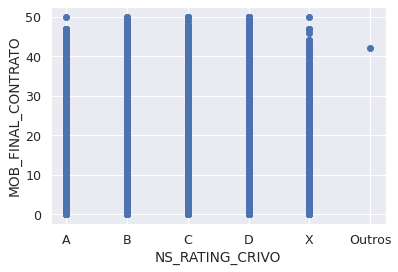

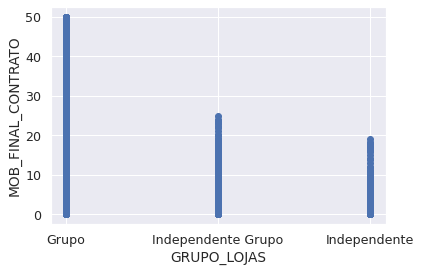

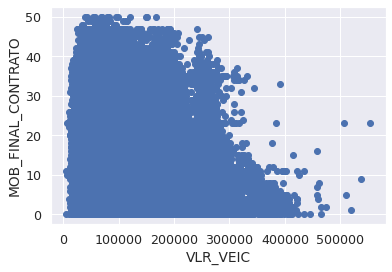

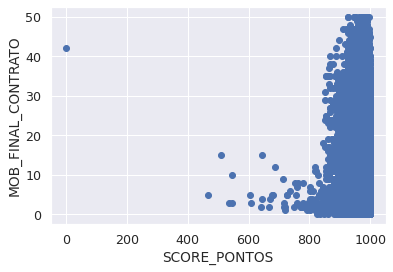

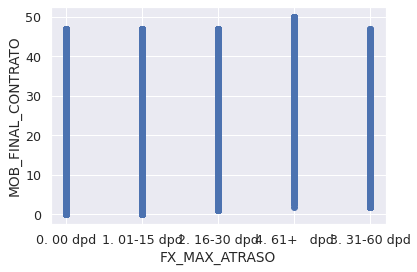

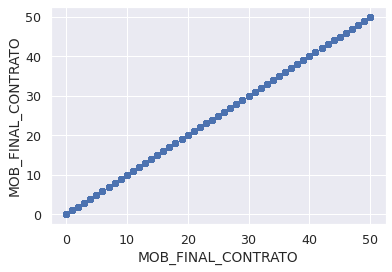

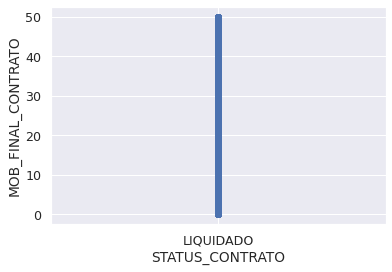

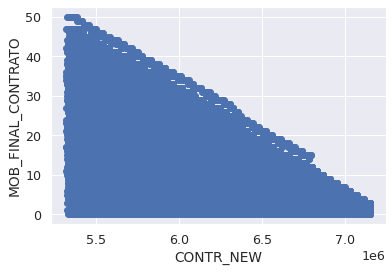

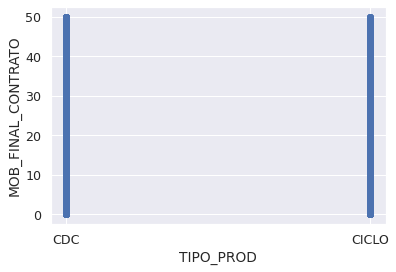

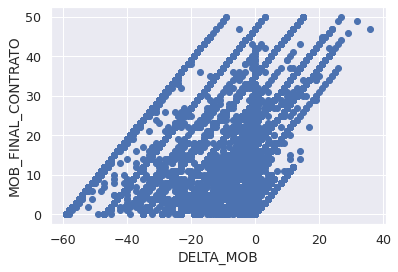

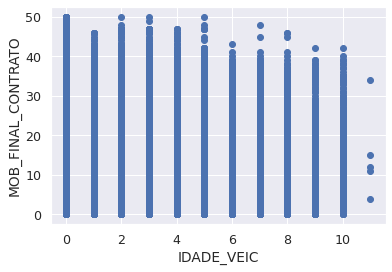

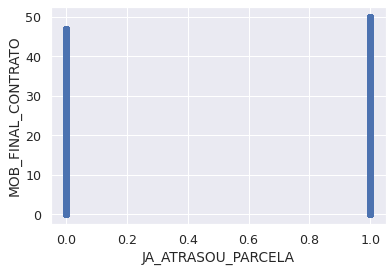

In [ ]:
# plotando Prazo versus MOB FINAL
number_cols = df_base.loc[:,df_base.columns]
for col in number_cols:
  plt.scatter(number_cols[col], number_cols['MOB_FINAL_CONTRATO'])
  plt.xlabel(col)
  plt.ylabel('MOB_FINAL_CONTRATO')
  plt.show()

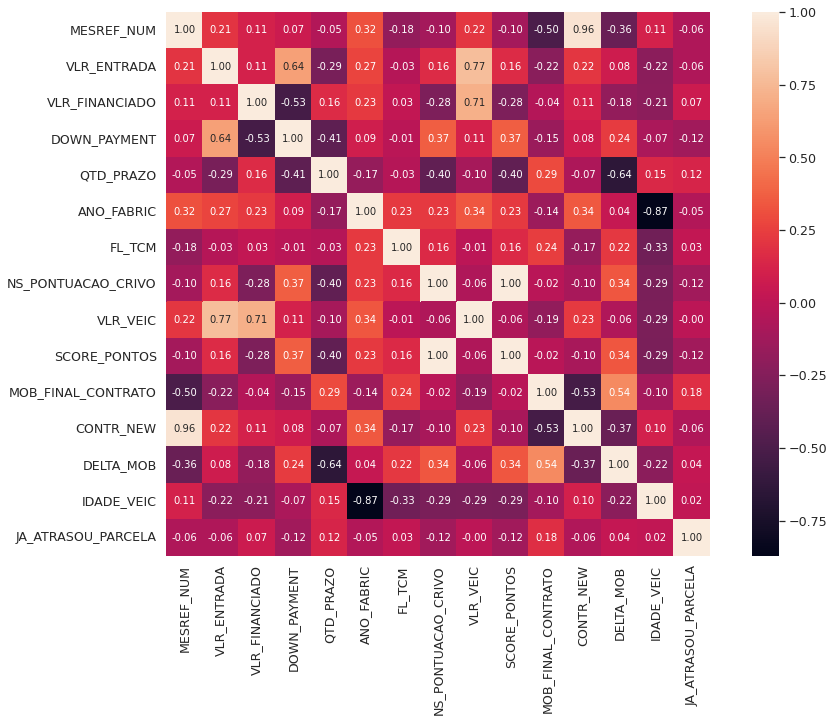

In [ ]:
#Análise de correlação
corrmat = df_base.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [ ]:
df_base.loc[:,df_base.columns].columns

Index(['MESREF_NUM', 'VLR_ENTRADA', 'VLR_FINANCIADO', 'DOWN_PAYMENT',
       'RANGE_DOWN_PAYMENT', 'QTD_PRAZO', 'QTD_PRAZO_AGRP', 'MODELO_AGRP',
       'ESTADO_VEICULO', 'ANO_FABRIC', 'FL_TCM', 'NS_RANGE_REGIAO',
       'NS_PONTUACAO_CRIVO', 'NS_RATING_CRIVO', 'GRUPO_LOJAS', 'VLR_VEIC',
       'SCORE_PONTOS', 'FX_MAX_ATRASO', 'MOB_FINAL_CONTRATO',
       'STATUS_CONTRATO', 'CONTR_NEW', 'TIPO_PROD', 'DELTA_MOB', 'IDADE_VEIC',
       'JA_ATRASOU_PARCELA'],
      dtype='object')

Identificados alguns dados os quais podemos excluir e outros para transformar em dummies, conforme planilha https://docs.google.com/spreadsheets/d/1k7XPgPVn-c3Yn84GKI_CKoTlB_i10q7z7ygr71bNdk0/edit#gid=0

In [ ]:
#criando base sem colunas
df_base_ajustada = df_base.drop([
              'MESREF_NUM','VLR_ENTRADA','VLR_FINANCIADO','RANGE_DOWN_PAYMENT','QTD_PRAZO_AGRP','ANO_FABRIC',
              'FL_TCM','NS_PONTUACAO_CRIVO','NS_RATING_CRIVO','GRUPO_LOJAS','FX_MAX_ATRASO','MOB_FINAL_CONTRATO',
              'STATUS_CONTRATO','CONTR_NEW','MODELO_AGRP'],axis=1,inplace=False)


In [ ]:
df_base_ajustada.head()

,DOWN_PAYMENT,QTD_PRAZO,ESTADO_VEICULO,VLR_VEIC,SCORE_PONTOS,TIPO_PROD,DELTA_MOB,IDADE_VEIC,JA_ATRASOU_PARCELA
0,0.57,24,N,50630.19,995.0,CDC,-2,0,0.0
1,0.67,36,N,75744.70,993.0,CDC,-8,0,0.0
2,0.28,36,N,75979.00,984.0,CICLO,0,0,0.0
3,0.54,24,N,55579.99,995.0,CICLO,0,0,1.0
4,0.46,36,N,86891.60,976.0,CDC,0,0,0.0


### Verificando Outliers

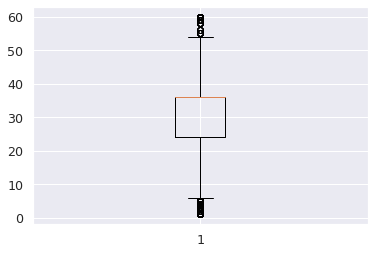

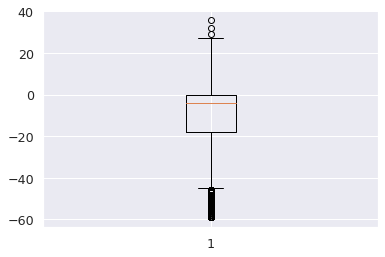

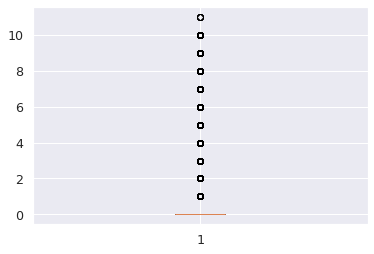

In [ ]:
# plotando Prazo versus MOB FINAL
number_cols = df_base_ajustada.select_dtypes(np.int64,np.float64).columns
for col in number_cols:
  plt.figure()
  plt.boxplot(df_base_ajustada[col])
  plt.show()

### 4. Modelo de regressão pra prever DELTA MOB (meses que terminou antes do fim do contrato):

In [ ]:
#Criando base somente com as colunas que serão utilizadas
df_base_ajustada = df_base.drop([
              'MESREF_NUM','VLR_ENTRADA','VLR_FINANCIADO','RANGE_DOWN_PAYMENT','ANO_FABRIC',
              'FL_TCM','NS_PONTUACAO_CRIVO','NS_RATING_CRIVO','GRUPO_LOJAS','FX_MAX_ATRASO','MOB_FINAL_CONTRATO',
              'STATUS_CONTRATO','CONTR_NEW','MODELO_AGRP'],axis=1,inplace=False)

In [ ]:
#Gerando colunas dummies para as váriaveis categóricas
df_base_ajustada = pd.get_dummies(df_base_ajustada,drop_first=True)
df_base_ajustada.head()

,DOWN_PAYMENT,QTD_PRAZO,VLR_VEIC,SCORE_PONTOS,DELTA_MOB,IDADE_VEIC,JA_ATRASOU_PARCELA,QTD_PRAZO_AGRP_13-24,QTD_PRAZO_AGRP_25-36,QTD_PRAZO_AGRP_37-48,QTD_PRAZO_AGRP_49-60,ESTADO_VEICULO_U,NS_RANGE_REGIAO_Nordeste,NS_RANGE_REGIAO_Norte,NS_RANGE_REGIAO_Sudeste,NS_RANGE_REGIAO_Sul,TIPO_PROD_CICLO
0,0.57,24,50630.19,995.0,-2,0,0.0,1,0,0,0,0,0,0,0,0,0
1,0.67,36,75744.70,993.0,-8,0,0.0,0,1,0,0,0,0,0,1,0,0
2,0.28,36,75979.00,984.0,0,0,0.0,0,1,0,0,0,0,0,0,0,1
3,0.54,24,55579.99,995.0,0,0,1.0,1,0,0,0,0,1,0,0,0,1
4,0.46,36,86891.60,976.0,0,0,0.0,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_all = df_base_ajustada

# vamos definir X (o preditor)
X = df_all.drop(['DELTA_MOB','QTD_PRAZO'],axis=1)
Y = df_all['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)
# descobrindo os betas
modelo_linear_AER = sm.OLS(Y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:40:28   Log-Likelihood:            -4.7921e+05
No. Observations:              134025   AIC:                         9.584e+05
Df Residuals:                  134009   BIC:                         9.586e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### - Teste de modelo utilizando somente contratos com prazo até 12 meses

In [ ]:
df_12 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(0,12)]
df_12

,DOWN_PAYMENT,QTD_PRAZO,VLR_VEIC,DELTA_MOB,IDADE_VEIC,JA_ATRASOU_PARCELA,ESTADO_VEICULO_U,NS_RANGE_REGIAO_Nordeste,NS_RANGE_REGIAO_Norte,NS_RANGE_REGIAO_Sudeste,NS_RANGE_REGIAO_Sul,TIPO_PROD_CICLO
9,0.65,12,198679.44,0,0,0.0,0,0,0,1,0,1
29,0.58,12,50856.12,0,0,0.0,0,0,0,1,0,0
30,0.00,6,50038.28,0,0,0.0,0,0,1,0,0,0
39,0.59,12,142667.27,0,0,0.0,0,0,0,1,0,0
74,0.00,12,50160.41,0,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
134217,0.87,12,166351.94,-8,0,1.0,0,0,0,1,0,0
134223,0.76,12,171529.88,-9,0,0.0,0,0,0,0,1,1
134224,0.49,12,276658.17,-8,0,1.0,0,0,1,0,0,0
134228,0.75,12,400100.81,-10,0,1.0,0,1,0,0,0,0


In [ ]:
df_12 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(0,12)]

# vamos definir X (o preditor)
X = df_12.drop(['DELTA_MOB'],axis=1)
y = df_12['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)

# descobrindo os betas
modelo_linear_AER = sm.OLS(y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1080.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:14:59   Log-Likelihood:                -34280.
No. Observations:               13217   AIC:                         6.858e+04
Df Residuals:                   13208   BIC:                         6.865e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.2901      2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### - Teste de modelo utilizando somente contratos com prazo entre 13 e 24 meses

In [ ]:
df_24 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(13,24)]

# vamos definir X (o preditor)
X = df_24.drop(['DELTA_MOB'],axis=1)
Y = df_24['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)

# descobrindo os betas
modelo_linear_AER = sm.OLS(Y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     1157.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:15:05   Log-Likelihood:            -1.4548e+05
No. Observations:               45521   AIC:                         2.910e+05
Df Residuals:                   45512   BIC:                         2.911e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -37.0241      2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### - Teste de modelo utilizando somente contratos com prazo entre 25 e 36 meses

In [ ]:
df_36 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(25,36)]

# vamos definir X (o preditor)
X = df_36.drop(['DELTA_MOB'],axis=1)
Y = df_36['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)

# descobrindo os betas
modelo_linear_AER = sm.OLS(Y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     948.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:15:10   Log-Likelihood:            -2.3034e+05
No. Observations:               61456   AIC:                         4.607e+05
Df Residuals:                   61447   BIC:                         4.608e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8928      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### - Teste de modelo utilizando somente contratos com prazo entre 37 e 48 meses

In [ ]:
df_48 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(37,48)]

# vamos definir X (o preditor)
X = df_48.drop(['DELTA_MOB'],axis=1)
Y = df_48['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)

# descobrindo os betas
modelo_linear_AER = sm.OLS(Y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     266.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:15:14   Log-Likelihood:                -41556.
No. Observations:               11088   AIC:                         8.313e+04
Df Residuals:                   11079   BIC:                         8.320e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 28.4926      6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### - Teste de modelo utilizando somente contratos com prazo entre 49 e 60 meses


In [ ]:
df_60 = df_base_ajustada[df_base_ajustada.QTD_PRAZO.between(49,60)]

# vamos definir X (o preditor)
X = df_60.drop(['DELTA_MOB'],axis=1)
Y = df_60['DELTA_MOB']

#Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). 
# Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

X = sm.add_constant(X)

# descobrindo os betas
modelo_linear_AER = sm.OLS(Y, X)
modelo_linear_AER = modelo_linear_AER.fit()

# vamos usar o model.summary() para coletar algumas informações
print_model = modelo_linear_AER.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              DELTA_MOB   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     49.44
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           5.35e-75
Time:                        00:15:18   Log-Likelihood:                -10193.
No. Observations:                2743   AIC:                         2.040e+04
Df Residuals:                    2734   BIC:                         2.046e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.2454     14

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### O melhor modelo encontrado foi aquele utilizando todos os contratos da base, independente do prazo do financiamento.